<a href="https://colab.research.google.com/github/phoevos/impi/blob/main/NN_Ex2_Team52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indlovu

> *Enter the cult...*


## Στοιχεία Ομάδας

> **Ομάδα 52:**
* Δούκας Θωμάς (03116081)
* Καλεμκερής Φοίβος-Ευστράτιος (03116010)
* Ψαρράς Ιωάννης (03116033)

In [ ]:
#installing essential packages
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.5MB 5.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 5.6 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=514499a72009f5535fc04abfef3ea9c8329795279bc90f9659b8a539af2e3e26
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο Carnegie Mellon Movie Summary Corpus. Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και, τέλος, τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset.

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

## Προσδιορισμός υποσυνόλου ομάδας

Στη συνέχεια, προσδιορίζουμε το υποσύνολο 5.000 ταινιών που αντιστοιχεί στην ομάδα μας (ομάδα 52), με τον τρόπο που υποδεικνύεται στην εκφώνηση.

In [ ]:
import numpy as np

# team 52
team_seed_number = 52

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)
 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

## Εφαρμογή 1

Η πρώτη εφαρμογή που θα αναπτύξουμε θα είναι ένα σύστημα συστάσεων ταινιών βασισμένο στο περιεχόμενο (content based recommender system) και συγκεκριμένα στις συνόψεις των ταινιών (corpus).

### Μετατροπή σε TFIDF

Μετατρέπουμε, αρχικά, το corpus σε αναπαράσταση tf-idf. Στο σημείο αυτό θα χρησιμοποιήσουμε τον TfidfVectorizer με τις default παραμέτρους. Φυσικά η υλοποίηση αυτή δεν είναι βέλτιστη, αφού οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν δραματική επίδραση στην ποιότητα των συστάσεων και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη διαστατικότητα και τον όγκο των δεδομένων.  
Με τη βελτιστοποίηση του vectorization θα ασχοληθούμε μετά τη δημιουργία της συνάρτησης content_recommender, προκειμένου να είμαστε σε θέση να αξιολογήσουμε την ποιότητα των συστάσεων για διαφορετικές ρυθμίσεις του TfidfVectorizer.  
Όπως βλέπουμε παρακάτω, το αρχικό σύνολο δεδομένων έχει 49086 χαρακτηριστικά. Διαβλέπουμε εδώ, λαμβάνοντας υπόψη την εμπειρία από την επιβλεπόμενη μάθηση, την αναγκαιότητα μείωσης των διαστάσεων του συνόλου δεδομένων, προκειμένου να πραγματοποιήσουμε ικανοποιητικές συστάσεις και στη συνέχεια κατηγοριοποίηση των ταινιών.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
print(corpus_tf_idf.shape)

(5000, 49086)


### Υλοποίηση του συστήματος συστάσεων

Επιθυμούμε τώρα να υλοποιήσουμε τη συνάρτηση content_recommender(), η οποία θα δέχεται δύο ορίσματα, τα target_movie και max_recommendations. Ειδικότερα, στην target_movie περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, max_recommendations στο πλήθος.  
Για την υλοποίηση χρησιμοποιούμε το corpus_tf_idf, το οποίο περιλαμβάνει την επεξεργασμένη πληροφορία για τις συνόψεις των ταινιών. Επιθυμούμε να υπολογίσουμε την ομοιότητα της ταινίας-στόχου, με όλες τις υπόλοιπες στο dataset. Ακολουθώντας τη λογική των παραδειγμάτων του εργαστηρίου, χρησιμοποιούμε την απόσταση συνημιτόνου (αντίστροφη της ομοιότητας), την οποία υπολογίζουμε για κάθε ταινία στην πυκνή αναπαράσταση του corpus_tf_idf πλην της ταινίας στόχου και την αποθηκεύουμε σε μια λίστα. Ύστερα, ταξινομούμε τη λίστα με αύξουσα σειρά, δηλαδή από τη μικρότερη απόσταση στη μεγαλύτερη (θα ταξινομούσαμε αντίστροφα αν είχαμε χρησιμοποιήσει ομοιότητα συνημιτόνου). Τέλος, εκτυπώνουμε το ID, τον τίτλο, την κατηγορία και τη σύνοψη για την ταινία στόχο, αλλά και για τις πρώτες max_recommendations στο πλήθος ταινίες που περιλαμβάνονται στην ταξινομημένη λίστα και αντιστοιχούν στις πιο συναφείς ταινίες. 

In [ ]:
import scipy as sp

def content_recommender(target_movie, max_recommendations):
  distances = []
  corpus_tf = corpus_tf_idf.toarray()
  movie = corpus_tf[target_movie]

  for i, mov in enumerate(corpus_tf):
    if(not(i==target_movie)):
      distances.append((sp.spatial.distance.cosine(movie, mov), i))
  
  distances.sort()

  print("Target Movie:\n")
  print("  ID:", target_movie)
  print("  Title:", titles[target_movie][0])
  print("  Category:", categories[target_movie][0].replace('"', ''))
  print("  Summary:", corpus[target_movie])
  print("------------------------------------------------------------------------------------------------------------------------------------------------\n")

  print("Recommendations:\n")
  for num, i in enumerate(distances[:max_recommendations]):
    print("-Recommended movie No.", num+1)
    print("  ID:", i[1])
    print("  Title:", titles[i[1]][0])
    print("  Category:", categories[i[1]][0].replace('"', ''))
    print("  Summary:", corpus[i[1]])
    print("------------------------------------------------------------------------------------------------------------------------------------------------")

### Βελτιστοποίηση

Μετά τη δημιουργία της content_recommender καλούμαστε να βελτιστοποιήσουμε τον TfidfVectorizer προκειμένου να λάβουμε καλύτερες συστάσεις. Αρχίζουμε να παρατηρούμε τις εξόδους της συνάρτησης για μικρές τιμές του max_recommendations και δοκιμάζουμε να αξιοποιήσουμε τις παραμέτρους του TfidfVectorizer. 

#### Επεξήγηση επιλογών και ποιοτική ερμηνεία

Όπως συμπεραίνουμε, αρχικά, επιτακτική είναι η ανάγκη φιλτραρίσματος πολύ συχνών λέξεων που δεν παρέχουν σημαντική νοηματική πληροφορία σχετικά με το περιεχόμενο της ταινίας και, επομένως δεν τη διαφοροποιούν από τις υπόλοιπες. Για το λόγο αυτό θα χρησιμοποιήσουμε πρώτα την παράμετρο του TfidfVectorizer stop_words='english', προκειμένου να απορρίψουμε από το σύνολο δεδομένων μερικές από τις πιο συχνές λέξεις της αγγλικής γλώσσας (κυρίως άρθρα, σύνδεσμοι κλπ).  
Ταυτόχρονα, πειραματιζόμαστε με τις τιμές των max_df και min_df, προκειμένου να ρυθμίσουμε την ελάχιστη και μέγιστη αποδεκτή συχνότητα εμφάνισης της λέξης στο σύνολο ταινιών. Παρόλο που μοιάζει να υπάρχει κάποια βελτίωση στην ποιότητα των συστάσεων (ειδικά για μεγαλύτερα min_df π.χ. 30), συμπεραίνουμε ότι αυτή είναι συμπτωματική, εμφανίζοντας καλά αποτελέσματα για ταινίες με βάση τις οποίες έγινε η διαδικασία βελτιστοποίησης, αλλά εξαιρετικά κακά σε άλλες, τυχαία επιλεγμένες.    

Παρατηρούμε, ειδικότερα, ότι το σύστημα συστάσεων μας έχει μια βασική αδυναμία: βασίζει σε μεγάλο βαθμό την απόφασή του στα ονόματα που εμφανίζονται στην περιγραφή (που εμφανίζονται άλλωστε πολύ συχνά σε μια περιγραφή ταινίας). Για να το διαχειριστούμε (μιας και η αύξηση του min_df δεν αποδείχτηκε όσο αποτελεσματική θα θέλαμε- μετά το 30 μένουν πια ελάχιστες λέξεις, με αποτέλεσμα να δυσχεραίνει η διαδικασία σύστασης), αποφασίζουμε να απορρίψουμε από το dataset όσες λέξεις αντιστοιχούν σε ονόματα. Για το λόγο αυτό κατεβάσαμε [δύο πίνακες](https://data.world/len/us-first-names-database) με δεδομένα από το data.world. Ο πρώτος περιλαμβάνει περίπου 150.000 επίθετα και ο δεύτερος 33.000 μικρά ονόματα, όπως έχουν προκύψει από επίσημα αρχεία των ΗΠΑ.  
Όπως φαίνεται και στον ακόλουθο κώδικα, διαβάζουμε τα αντίστοιχα .xlsx και .csv αρχεία, κρατάμε μόνο τα ονόματα, τα οποία και μετατρέπουμε σε lowercase και στη συνέχεια τα συνενώνουμε με τη λίστα των stop_words που χρησιμοποιείται από τον Vectorizer.

In [ ]:
from sklearn.feature_extraction import text

names = 'SSA_Names_DB.xlsx'
df1 = pd.read_excel(names, usecols=[0]) 
df1 = df1['Name'].str.lower()
df1 = df1.values

surnames = 'Common_Surnames_Census_2000.csv'
df2 = pd.read_csv(surnames, usecols=[0]) 
df2 = df2['name'].str.lower()
df2 = df2.values

stop_words = text.ENGLISH_STOP_WORDS.union(list(df1)).union(list(df2))

Στη συνέχεια, επιδιώκοντας τη βελτίωση της ποιότητας της συλλογής λέξεων που παρέχεται στον Vectorizer, αποφασίζουμε να παρακάμψουμε τον default tokenizer αυτού, προκειμένου να εφαρμόσουμε stemming στις λέξεις. Για το σκοπό αυτό θα υλοποιήσουμε τη συνάρτηση tokenize που χρησιμοποιεί τον PorterStemmer της nltk, όπως φαίνεται παρακάτω.

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Τελικά, εκπαιδεύουμε τον Vectorizer, ο οποίος χρησιμοποιεί πλέον τη νέα λίστα από stop_words που συμπεριλαμβάνει τα ονόματα και τον custom tokenizer. Πραγματοποιούμε ορισμένες ακόμα ρυθμίσεις στα max_df και min_df προκειμένου να προσαρμοστούν στα νέα δεδομένα. Επισημαίνουμε ότι μας ενδιαφέρει κύριως η μείωση της διαστατικότητας. Με τις βελτιστοποιήσεις που αναλύσαμε παραπάνω προκύπτει ένα σύνολο 29837 χαρακτηριστικών (σημαντική μείωση από τα 49000 που είχαμε αρχικά). Επιθυμούμε να κρατήσουμε λιγότερο απ' το 1/10 των αρχικών χαρακτηριστικών. Καταλήγουμε έτσι μετά από δοκιμές σε max_df=0.2, min_df=10, με τα οποία προκύπτουν τελικά 5691 χαρακτηριστικά.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

vectorizer = TfidfVectorizer(tokenizer=tokenize, max_df=0.2, min_df=10, stop_words=stop_words) #max_df=0.4, min_df=15, 
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
print(corpus_tf_idf.shape)

(5000, 3691)


#### Συστάσεις

Στη συνέχεια θα παρουσιάσουμε μερικές κλήσεις τη συνάρτησης content_recommender() που επιστρέφουν καλά αποτελέσματα. Θα δοκιμάσουμε 6 συστάσεις για κάθε ταινία.

> **ID**: 1789  
> **Title**: Sherlock Holmes: A Game of Shadows  

Οι ταινίες που προτείνονται ανήκουν κυρίως στις κατηγορίες Thriller και Crime Fiction, ενώ η θεματική τους περιστρέφεται γύρω από την κατασκοπεία (spy) και τους μυστικούς πράκτορες (agent), δολοφονίες (kill), τρομοκρατικές επιθέσεις (bomb, terrorist, radical).

---

> **ID**: 1620  
> **Title**: Moby Dick 

Είναι ενδιαφέρον ότι οι ταινίες που προτείνονται έχουν αρκετά διαφορετική θεματολογία, με εξαίρεση άλλη μία σχετική με τον Moby Dick. Οι προτάσεις είναι κατά κύριο λόγο περιπέτειες και ταινίες εποχής γεγονός ενθαρρυντικό. Άλλες αναφέρονται σε μυθικά πλάσματα. Θα πρέπει βέβαια να σχολιάσουμε ότι δύο από τις προτάσεις παρουσιάζουν έντονη αναφορά στη λέξη "legs" (στο Moby Dick, ο καπετάνιος Ahab είχε χάσει το πόδι του από τη φάλαινα). Στη μία απ' αυτές το legs αποτελεί επίθετο και άρα οδηγούμαστε σε κακή σύσταση, που όμως δε θα μπορούσε να έχει αποφευχθεί στο σημείο αυτό.

---

> **ID**: 17  
> **Title**: 300 

Οι ταινίες που προτείνονται μοιράζονται σε πολλές κατηγορίες, διαθέτουν, ωστόσο, κοινά χαρακτηριστικά με διαφορετικές πτυχές της ταινίας-στόχου. Προτείνονται, συγκεκριμένα, ταινίες με κοινο ιστορικό περιεχόμενο (300, Σπαρτιάτες, Περσία), αλλά και άλλες που αναφέρονται σε βασιλιάδες, μυθικά πρόσωπα και μάχες.

---

> **ID**: 568  
> **Title**: Bugs Bunny's 3rd Movie: 1001 Rabbit Tales 

Οι ταινίες που προτείνονται ανήκουν όλες στην κατηγορία animation, ενώ όλες περιλαμβάνουν λαγούς. Είναι σαφές ότι κοινό στις περισσότερες είναι ο Bugs Bunny και γενικά τα Looney Tunes.

---

> **ID**: 174  
> **Title**: Tarzan's Greatest Adventure

Οι ταινίες που προτείνονται αναφέρονται όλες στον Tarzan, ενώ περιλαμβάνουν επιπλέον κοινές λέξεις, όπως η ζούγκλα και διάφορα ζώα. Είναι πιθανό, πάντως, ο Ταρζάν να μη συμπεριλαμβανόταν στη λίστα με τα ονόματα που προσθέσαμε στις stop_words.

---

> **ID**: 2799  
> **Title**: Pastor Hall

Οι ταινίες που προτείνονται ανήκουν στη συντριπτική τους πλειοψηφία στην κατηγορία War Films. Ειδικότερα φαίνεται να έχουν κοινές αναφορές στον 1ο και 2ο Παγκόσμιο Πόλεμο, στους Ναζί, τα στρατόπεδα συγκέντρωσης.

---

> **ID**: 4429  
> **Title**: Sadayam

Οι ταινίες που προτείνονται εμφανίζουν μεγάλη θεματική συνάφεια. Όλες αναφέρονται και περιστρέφονται γύρω από φυλακές, κρατούμενους, συλλήψεις και καταδίκες, αποδράσεις και γενικότερα διάπραξη εγκλημάτων. Βλέπουμε στο παράδειγμα αυτό ένα από τα καλύτερα αποτελέσματα του συστήματος συστάσεών μας που οφείλεται, βέβαια, σε μεγάλο βαθμό στην κοινή θεματολογία των συγκεκριμένων ταινιών, στη χρήση ειδικών όρων, αλλά και στην περιγραφικότητα με την οποία συντάσσονται οι συνόψεις ταινιών αυτής της θεματικής (παρόμοια με τις πολεμικές ταινίες που είδαμε προηγουμένως).

---

> **ID**: 4060  
> **Title**: 102 Dalmatians

Το συγκεκριμένο παράδειγμα αποτελεί μια σχετικά εύκολη είσοδο για το σύστημα συστάσεων, το οποίο εντοπίζει με επιτυχία τις ταινίες στις οποιές κατοικίδια και, συγκεκριμένα, σκυλιά διαδραματίζουν κεντρικό ρόλο στην πλοκή ή είναι τα ίδια "πρωταγωνιστές". Κοινές λέξεις που εμφανίζονται, επομένως, στις συστάσεις είναι τα dog, puppy και άλλες λέξεις σχετικές με τους σκύλους. Μόνο μια σύσταση είναι εξωφρενικά άσχετη με τις υπόλοιπες, όπου αν και πράγματι σε ένα σημείο εμφανίζεται η λέξη dog, υποθέτουμε ότι η συσχέτισή της με την αρχική ταινία οφείλεται σε μεγάλο βαθμό στο γεγονός ότι η περιγραφή της συγκεκριμένης σύστασης είναι κατά πολύ μεγαλύτερη από τις υπόλοιπες, με αποτέλεσμα να ταιριάζουν και άλλες μικρότερης σημασίας λέξεις που αποτύχαμε να φιλτράρουμε, με αντίστοιχες της ταινίας-στόχου.

---

> **ID**: 630  
> **Title**: A Christmas Carol

Η συγκεκριμένη αποτελεί άλλη μια περίπτωση ταινίας που μας δίνει πολύ καλές προτάσεις. Ως κεντρικό θέμα φαίνεται να κυριαρχούν τα Χριστούγεννα, ενώ συχνές αναφορές γίνονται στον Άγιο Βασίλη (Santa Claus), τα παιδιά και τα δώρα. Οι περισσότερες συστάσεις αποτελούν οικογενειακές ταινίες, με κάποιες από αυτές να είναι animation.

---

> **ID**: 4893  
> **Title**: Red Nightmare

Οι προτάσεις για τη συγκεκριμένη ταινία προέρχονται από πολύ διαφορετικά είδη: περιπέτειες, κωμωδίες, πολεμικές ταινίες. Όλες, ωστόσο, περιστρέφονται γύρω απ' τη Σοβιετική Ένωση και το κομμουνιστικό καθεστώς αυτής. Συχνές είναι οι αναφορές στις ΗΠΑ μεταξύ πολλών προτάσεων και γενικότερα στον Δεύτερο Παγκόσμιο Πόλεμο και σε έννοιες και πρόσωπα συνυφασμένες με αυτόν.

---

## Εφαρμογή 2

Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και, κυρίως, το είδος τους.

### Δημιουργία dataset

Η build_final_set αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της TfidfVectorizer() σε πυκνή. 

Στη συνέχεια ενώνει την πυκνή dense_tf_idf αναπαράσταση και τις binarized κατηγορίες catbins των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Επιλέγεται η χρήση του βελτιστοποιημένου TfidfVectorizer(), που προέκυψε από το ερώτημα 1. Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της. 

Για την ανάλυση που ακολουθεί γίνεται χρήση του συνόλου του dataset (doc_limit = 5000)

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

In [ ]:
final_set.shape

(5000, 4013)

Με βάση τις παρατηρήσεις μας από την προηγούμενη εργαστηριακή άσκηση θεωρούμε πως ιδιαίτερα χρήσιμες είναι ενέργειες που οδηγούν στην μείωση της διαστατικότητας του dataset. Συγκεκριμένα, χρησιμοποιώντας το σύνολο των μοναδικών λέξεων που περιέχονται στις περιγραφές πλοκής των ταινιών δειγμάτων καταλήγουμε σε μεγάλο αριθμό χαρακτηριστικών. Τεράστια πλήθη στηλών εισάγουν, εκτός από μεγάλες χρονικές καθυστερήσεις κατά την φάση εκπαίδευσης, περιττό θόρυβο που δυσχεραίνει την κατηγοριοποίηση. 

Ως εκ τούτου, απαραίτητο βήμα για την συγκεκριμένη εφαρμογή κρίνεται η επιλογή χαρακτηριστικών, η οποία πραγματοποιήθηκε στην επιβλεπόμενη μάθηση με χρήση του PCA. Αυτή τη φορά για την επίτευξη της μείωσης των χαρακτηριστικών θα χρησιμοποιηθεί το corpus_tf_idf, όπως αυτό προκύπτει από την βελτιστοποιημένη εκδοχή του TfidfVectorizer που υλοποιήθηκε για τις ανάγκες του προηγούμενου ερωτήματος και στοχεύει στην επιλογή εκείνων των λέξεων με τη μεγαλύτερη συνεισφορά στο νοηματικό περιεχόμενο.

### Εκπαίδευση χάρτη SOM

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import joblib
import matplotlib
import matplotlib.pyplot as plt
# we will plot inside the notebook and not in separate window
%matplotlib inline

Ξεκινήσαμε την διερεύνησή μας χρησιμοποιώντας έναν χάρτη 10x10 με 100 epochs για ένα υποσύνολο του dataset, των 2000 ταινιών. Καθώς αυξάναμε το μέγεθος του χάρτη, παρατηρήσαμε βελτίωση στα παραγόμενα αποτελέσματα. Για την περίπτωση χάρτη μεγέθους 20x20 οδηγούμαστε σε καλύτερες ομαδοποιήσεις ταινιών, ενώ ταυτόχρονα ο πίνακας u-matrix που παράγεται κυριαρχείται απο περιοχές μικρότερων αποστάσεων (μπλε - πράσινες - κίτρινες). Επεκτείνοντας την διερεύνηση μας στο πλήρες dataset των  5000 δειγμάτων καταλήγουμε σε παρόμοια συμπεράσματα.

Για την βέλτιστη επιλογή των clusters που χρησιμοποιούνται από τον αλγόριθμο ομαδοποίησης KMeans δοκιμάσαμε τις τιμές n_clusters=20 και n_clusters=25. Αναφέρουμε ότι η δεύτερη περίπτωση κρίνεται οριακά καλύτερη, με τα αποτελέσματα να μην εμφανίζουν σημαντικές αποκλίσεις μεταξύ τους.

In [ ]:
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs=100)

CPU times: user 47min 5s, sys: 5.63 s, total: 47min 11s
Wall time: 23min 57s


### Best matching units

Μετά το train, εντοπίζουμε και αποθηκεύουμε τα μοναδικά best matching units, τους νευρώνες δηλαδή στους οποίους έχει αντιστοιχηθεί τουλάχιστον μία ταινία. Ο πίνακας indices περιέχει τους αντίστοιχους δείκτες προς τις ταινίες αυτές. Τα παρακάτω δεδομένα θα φανούν χρήσιμα για την ερμηνεία των αποτελεσμάτων.

In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus)
print(indices)

[[ 0  0]
 [ 0  1]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  8]
 [ 1  9]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 2 11]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 16]
 [ 2 17]
 [ 2 19]
 [ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  7]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 13]
 [ 4 15]
 [ 4 16]
 [ 4 17]
 [ 4 18]
 [ 4 19]
 [ 5  0]
 [ 5  1]
 [ 5  3]
 [ 5  5]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 5 13]
 [ 5 14]
 [ 5 15]
 [ 5 16]
 [ 5 18]
 [ 5 19]
 [ 6  0]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  6]
 [ 6  7]
 [ 6  8]
 [ 6  9]
 

### Ομαδοποίηση (clustering)

Στη συνέχεια, κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας τον αλγόριθμο k-Means για 25 clusters.

In [ ]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=25)
som.cluster(algorithm=alg)

### Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήσαμε τη view_umatrix με ορίσματα bestmatches=True, colorbar=True και figsize=(15, 15). Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Εμφανίζουμε τον U-Matrix για τα παραπάνω αποτελέσματα, τόσο σε μορφή χάρτη όσο και σε μορφή πίνακα των cluster IDs για καλύτερη οπτικοποίηση.

Στη συνέχεια, εκτυπώνουμε τα IDs των clusters, διατεταγμένα ως προς τον αριθμό των νευρώνων που έχουν καταλάβει. Ο αριθμός των νευρώνων αυτών, για κάθε cluster, εμφανίζεται στον πίνακα str_neurons. Αυτό μας επιτρέπει να εντοπίσουμε ευκολότερα τα μεγαλύτερα clusters, πράγμα που βοηθά στην σημασιολογική ερμηνεία των αποτελεσμάτων.

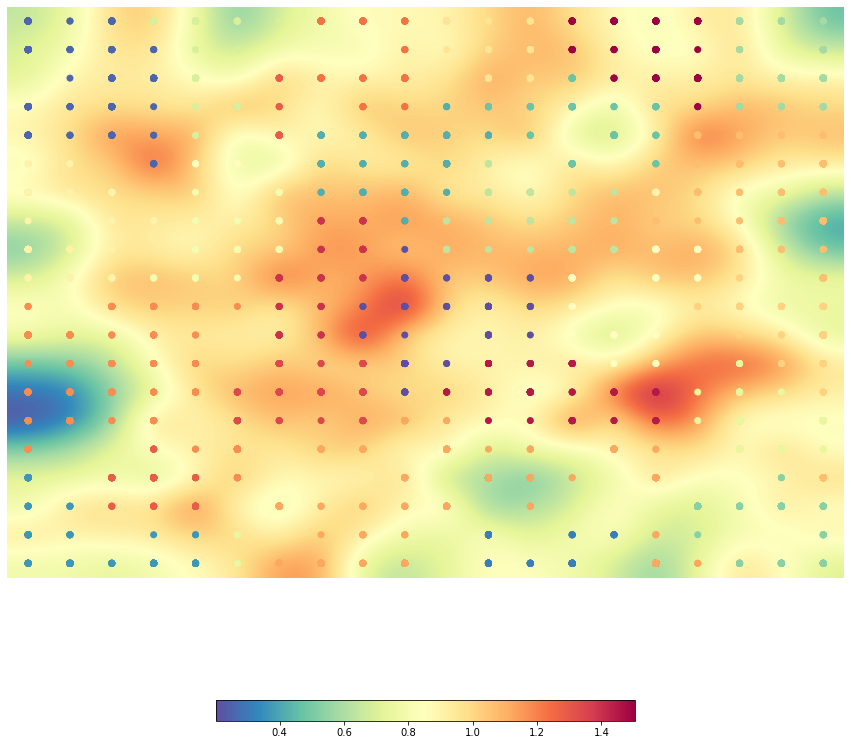

[[ 1  1  1  9  9  9  9 19 19 19 14 14 14 24 24 24 24  7  7  7]
 [ 1  1  1  1  9  9  9 19 19 19 14 14 14 24 24 24 24  7  7  7]
 [ 1  1  1  1  9  9 20 19 19 19 14 14 14  5 24 24 24  7  7  7]
 [ 1  1  1  1  9  9 20 19 19 19  4  5  5  5  5  5 24  7  7  7]
 [ 1  1  1  1  9 12 20  4  4  4  4  4  5  5  5  5 16 16 16 16]
 [13 13  1  1 12 12 12  4  4  4  4  8  8  5  5  5 16 16 16 16]
 [13 13 13 13 11 11 11  4  4  4  4  8  8  8  8 13 16 16 16 16]
 [13 13 13 13 11 11 11 22 22  4  8  8  8  8  8 16 16 16 16 16]
 [13 13 13 11 11 11 11 22 22  0  8  8  8  8  8 12 12 16 16 16]
 [13 13 13 11 11 11 22 22 22  0  0  0  0 12 12 12 12 15 16 16]
 [18 18 18 18 18 18 22 22  0  0  0  0  0 12 12 12 15 15 15 15]
 [18 18 18 18 18 18 22 22  0  0  0  0  0 12 12 12 15 15 15 15]
 [18 18 18 18 18 21 21 21 21  0  0 23 23 23 12 12 10 10 15 15]
 [18 18 18 18 18 21 21 21 21  0 23 23 23 23 23 23 10 10 10 15]
 [18 18 18 18 18 21 21 21 21 17 17 23 23 23 23 23 10 10 10 10]
 [18 18 20 20 18 18 21 17 17 17 17 17 17 17 17 17 10 10

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))
print(som.clusters)
uclusters, neurons = np.unique(som.clusters, return_counts=True)
srt_clusters = np.argsort(neurons)
srt_neurons = np.sort(neurons)
print("\nClusters sorted by increasing number of neurons:")
print("\nCluster index:")
print(srt_clusters)
print("Number of neurons:")
print(srt_neurons)

print(som.clusters[0])

### Σημασιολογική ερμηνεία των clusters

Προκειμένου να ερμηνεύσουμε σωστά τα παραγόμενα αποτελέσματα, υλοποιούμε το παρακάτω κριτήριο αξιολόγησης της ομαδοποίησης. Συγκεκριμένα, μέσω των βοηθητικών συναρτήσεων που ακολουθούν, προσδιορίζουμε τους νευρώνες που ανατίθενται σε κάθε cluster. Ακολούθως, εντοπίζουμε τις ταινίες που αντιστοιχούν σε κάθε έναν από αυτούς. Διατρέχοντας το σύνολο των κατηγοριών που χαρακτηρίζουν τις παραπάνω ταινίες, εμφανίζουμε τις συχνότητες των κατηγοριών αυτών για κάθε cluster.

Παρακάτω παρουσιάζεται το σύνολο της στατιστικής ανάλυσης για όλα τα clusters, χάριν καλύτερης εποπτείας. Ειδικότερη αναφορά σε χαρακτηριστικές περιπτώσεις θα πραγματοποιηθεί στη συνέχεια.

In [ ]:
def print_categories_stats (ids):
  total_categories = []
  results = []
  # Find categories for movies in ids list
  for id in ids:
    temp_cats = categories[id][0].replace('"', '').split(',')
    for string in temp_cats:
      temp_cats[temp_cats.index(string)] = string.strip()
    total_categories.extend(temp_cats) 
  total_categories, freq = np.unique(total_categories, return_counts=True)

  axis_sort = np.argsort(freq)[::-1]
  total_categories = np.take_along_axis(total_categories, axis_sort, axis=0)
  freq = np.take_along_axis(freq, axis_sort, axis=0)

  for ind in range(len(freq)):
     results.append( (total_categories[ind], freq[ind]) )
  print(results)
  print("------------------------------------")
  
def print_cluster_neurons_movies_report(cluster_id):
  print("Results for cluster:", cluster_id)
  # Find position of neurons (in som.clusters) for cluster_id
  cl_ind = np.where(som.clusters==cluster_id)
  # Create list with coordinates for bmus of cluster_id
  coords = np.column_stack((cl_ind[1], cl_ind[0])) #[column, row]
  # Check in ubmus
  neurons = []
  for i in coords:
    magic = np.where((ubmus == i).all(axis=1))
    if (len(magic[0])):
      neurons.append( magic[0][0] )
  return neurons
  
def neuron_movies_report(neu_list):
  movies = []
  for neu in neu_list:
    for key, value in enumerate(indices):
      if (neu == value):
        movies.append(key)
  print_categories_stats(movies)

### Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Παρακάτω, θα παρουσιαστούν κάποιες χαρακτηριστικές περιπτώσεις με βάση τις οποίες θα εξετάσουμε την αποτελεσματικότητα του αυτοοργανούμενου χάρτη SOM.

1.Εκτελώντας τη συνάρτηση print_categories_stats για το σύνολο του dataset, εμφανίζονται οι συχνότερες κατηγορίες ταινιών. Από αυτές, παρατηρούμε, ότι οι πιο συχνά χρησιμοποιούμενες κατηγορίες είναι οι "Drama", "Comedy" και "Thriller". Εκτυπώνοντας τα χαρακτηριστικά για κάθε cluster παρατηρούμε εποπτικά ότι οι παραπάνω κατηγορίες εντοπίζονται σε πολλούς νευρώνες.

In [ ]:
print_categories_stats(list(range(5000)))
print('\n')

for i in range(len(srt_clusters)):
  neuron_movies_report(print_cluster_neurons_movies_report(i))

[('Drama', 2307), ('Comedy', 1218), ('Thriller', 794), ('Romance Film', 769), ('Action', 672), ('World cinema', 596), ('Crime Fiction', 526), ('Horror', 475), ('Black-and-white', 473), ('Indie', 453), ('Action/Adventure', 421), ('Adventure', 408), ('Family Film', 385), ('Short Film', 382), ('Romantic drama', 308), ('Science Fiction', 302), ('Musical', 296), ('Animation', 269), ('Mystery', 262), ('Fantasy', 261), ('Romantic comedy', 236), ('Comedy film', 215), ('Crime Thriller', 211), ('War film', 189), ('Silent film', 166), ('Comedy-drama', 153), ('Film adaptation', 148), ('Period piece', 148), ('Documentary', 147), ('Psychological thriller', 142), ('Japanese Movies', 137), ('Bollywood', 135), ('Western', 126), ('Chinese Movies', 112), ('Black comedy', 106), ('Family Drama', 103), ("Children's/Family", 102), ('Teen', 101), ('Coming of age', 89), ('Parody', 88), ('Martial Arts Film', 86), ('Suspense', 78), ('Television movie', 78), ('Cult', 77), ('Slasher', 72), ('Sports', 71), ('Supern

2.Στη συνέχεια, επιθυμούμε να εξετάσουμε τον τρόπο απεικόνισης μακρινών προτύπων εισόδου στον χάρτη. Αρχικά, τυπώνουμε τα στατιστικά για τα πιο απομακρυσμένα μεταξύ τους clusters, δηλαδή εκείνα που εμφανίζονται στις τέσσερις γωνίες. Πράγματι, έπειτα από εξέταση των αποτελεσμάτων, διαπιστώνουμε ότι στα άκρα του χάρτη έχουν αποδοθεί μερικές από τις πιο απομακρυσμένες εννοιολογικά κατηγορίες. Αυτές φαίνεται να είναι οι εξής:
  * Romance Film
  * Horror
  * Animation
  * Drama

In [ ]:
print("4 Corners:")
neuron_movies_report(print_cluster_neurons_movies_report(1))
neuron_movies_report(print_cluster_neurons_movies_report(7))
neuron_movies_report(print_cluster_neurons_movies_report(6))
neuron_movies_report(print_cluster_neurons_movies_report(3))

4 Corners:
Results for cluster: 1
[('Romance Film', 314), ('Drama', 313), ('Romantic drama', 277), ('World cinema', 132), ('Comedy', 117), ('Romantic comedy', 91), ('Indie', 51), ('Musical', 48), ('Comedy-drama', 44), ('Bollywood', 40), ('Period piece', 40), ('Film adaptation', 35), ('Melodrama', 21), ('Black-and-white', 21), ('Crime Fiction', 19), ('Fantasy', 14), ('Coming of age', 13), ('Costume drama', 12), ('Thriller', 11), ('Family Drama', 11), ('Action/Adventure', 9), ('Television movie', 9), ('Teen', 9), ('Art film', 7), ('Mystery', 7), ('War film', 7), ('Ensemble Film', 7), ('Biographical film', 7), ('Adventure', 6), ('Western', 6), ('Biography', 6), ('Political drama', 5), ('Horror', 5), ('Science Fiction', 5), ('Silent film', 5), ('Chinese Movies', 5), ('Courtroom Drama', 4), ('Biopic [feature]', 4), ('Black comedy', 4), ('Slice of life story', 4), ('Buddy film', 4), ('Japanese Movies', 4), ('Marriage Drama', 4), ('Sex comedy', 4), ('Dance', 4), ('Music', 4), ('Satire', 4), (

Αντίστοιχα, παρατηρούμε ότι τα clusters στα οποία έχουν ανατεθεί επιλεγμένες  εννοιολογικά διαφορετικές κατηγορίες, βρίσκονται, πράγματι σε απομακρυσμένες περιοχές του χάρτη. Συγκεκριμένα, για τις κατηγορίες Documentary vs Drama - Thriller και Word Cinema - Drama vs Comedy η ασυνάφεια του περιεχομένου αντικατοπτρίζεται στη μεγάλη απόσταση τους στο χάρτη.

In [ ]:
print("Documentary vs Drama-Thriller:")
neuron_movies_report(print_cluster_neurons_movies_report(17))
neuron_movies_report(print_cluster_neurons_movies_report(19))

print("\nWord Cinema-Drama vs Comedy:")
neuron_movies_report(print_cluster_neurons_movies_report(13))
neuron_movies_report(print_cluster_neurons_movies_report(16))

Documentary vs Drama-Thriller:
Results for cluster: 17
[('Documentary', 130), ('Short Film', 101), ('Silent film', 53), ('Western', 40), ('Japanese Movies', 35), ('Black-and-white', 30), ('Culture & Society', 30), ('Animation', 29), ('Indie', 28), ('War film', 26), ('Family Film', 25), ('Biography', 22), ("Children's/Family", 19), ('Fantasy', 19), ('Crime Fiction', 19), ('Romantic comedy', 17), ('Comedy-drama', 16), ('Chinese Movies', 16), ('Action/Adventure', 16), ('History', 13), ('Political cinema', 12), ('Social issues', 12), ('Bollywood', 11), ('Mystery', 10), ('Music', 8), ('Filipino Movies', 7), ('Biographical film', 7), ('Romantic drama', 7), ('Sports', 6), ('Computer Animation', 6), ('World cinema', 5), ('Rockumentary', 5), ('Revisionist Western', 5), ('Musical', 5), ('Propaganda film', 5), ('Costume drama', 5), ("Children's", 4), ('Law & Crime', 4), ('Anime', 4), ('Art film', 4), ("Children's Fantasy", 4), ('Wuxia', 4), ('Historical drama', 4), ('Film noir', 4), ('Satire', 3)

3.Συνεχίζοντας, καλούμαστε να εξετάσουμε την ομοιότητα των clusters που συνδέονται με ισχυρή τοπολογική σχέση ως προς τα χαρακτηριστικά.

Παρατηρώντας τον χάρτη SOM συμπεραίνουμε ότι δεν υπάρχει κάποια αξιοσημείωτη τοπολογική ασυνάφεια. Ειδικότερα, παρατηρούμε ότι σε κάθε cluster έχουν αποδοθεί σχετικές μεταξύ τους κατηγορίες. Ταυτόχρονα, στο σύνολο του χάρτη, οι μεταβάσεις ανάμεσα σε γειτονικά clusters είναι ομαλές.

Παρακάτω φαίνονται δύο πολύ χαρακτηριστικά παραδείγματα  cluster που επιδεικνύουν εξαιρετική εσωτερική συνοχή. Αφενός, στο cluster 7 συγκεντρώνονται ταινίες που υπάγονται στη γενικότερη κατηγορία του "Horror" με έμφαση σε ταινίες Β' διαλογής. Αφετέρου, σε ένα από τα μεγαλύτερα clusters, το 16, συγκεντρώνονται πολλά χαρακτηριστικά είδη κωμωδίας με έμφαση στη σάτιρα.

In [ ]:
print("Coherent clusters:")
neuron_movies_report(print_cluster_neurons_movies_report(7))
neuron_movies_report(print_cluster_neurons_movies_report(16))

Coherent clusters:
Results for cluster: 7
[('Horror', 257), ('Slasher', 59), ('B-movie', 45), ('Science Fiction', 42), ('Cult', 29), ('Creature Film', 26), ('Indie', 26), ('Supernatural', 26), ('Zombie Film', 23), ('Teen', 22), ('World cinema', 20), ('Comedy', 17), ('Thriller', 16), ('Monster movie', 15), ('Fantasy', 14), ('Psychological thriller', 14), ('Natural horror films', 12), ('Mystery', 10), ('Horror Comedy', 9), ('Sci-Fi Horror', 9), ('Crime Fiction', 8), ('Monster', 7), ('Black-and-white', 6), ('Haunted House Film', 6), ('Alien Film', 5), ('Black comedy', 5), ('Action', 4), ('Chinese Movies', 4), ('Drama', 4), ('Costume Horror', 4), ('Adventure', 4), ('Gothic Film', 4), ('Short Film', 3), ('Period piece', 3), ('Crime Thriller', 3), ('Television movie', 3), ('Documentary', 3), ('Japanese Movies', 3), ('Filipino Movies', 3), ('Disaster', 2), ('Action/Adventure', 2), ('Film adaptation', 2), ('Fantasy Adventure', 2), ('Romance Film', 2), ('Splatter film', 2), ('History', 1), ('Ps

Αντίστοιχα, επεκτείνοντας τη διερεύνησή μας σε μεγαλύτερες περιοχές του χάρτη παρατηρούμε ότι και μεταξύ γειτονικών block εμφανίζεται μεγάλη εννοιολογική συνάφεια.

Συγκεκριμένα, στο παράδειγμα που φαίνεται παρακάτω, η συνάφεια αυτή εντοπίζεται πολύ έντονα γύρω από το cluster 0, όπου όλα τα γειτονικά clusters κινούνται επίσης στο χώρο του "Action" και "Adventure". 

In [ ]:
print("Neighbouring Clusters:")
neuron_movies_report(print_cluster_neurons_movies_report(0))
neuron_movies_report(print_cluster_neurons_movies_report(22))
neuron_movies_report(print_cluster_neurons_movies_report(21))
neuron_movies_report(print_cluster_neurons_movies_report(23))
neuron_movies_report(print_cluster_neurons_movies_report(12))
neuron_movies_report(print_cluster_neurons_movies_report(8))
neuron_movies_report(print_cluster_neurons_movies_report(4))

Neighbouring Clusters:
Results for cluster: 0
[('Adventure', 121), ('Action', 71), ('Fantasy', 39), ('Action/Adventure', 35), ('Science Fiction', 25), ('Black-and-white', 18), ('Martial Arts Film', 11), ('Superhero movie', 11), ('Comedy', 11), ('Chinese Movies', 11), ('War film', 11), ('Romance Film', 11), ('Family Film', 10), ('World cinema', 10), ('Thriller', 9), ('Fantasy Adventure', 9), ('Western', 9), ('Fantasy Comedy', 7), ('Wuxia', 6), ('Spy', 5), ('Costume drama', 5), ('Japanese Movies', 5), ('Jungle Film', 5), ('Mythological Fantasy', 5), ('Superhero', 4), ('Costume Adventure', 4), ('Swashbuckler films', 4), ('Sword and Sandal', 3), ('Horror', 3), ('Indie', 3), ('Animated cartoon', 3), ('Sword and sorcery films', 3), ('Animation', 3), ('Sword and sorcery', 3), ('Action Comedy', 3), ('Anime', 3), ("Children's", 2), ("Children's/Family", 2), ('Crime Fiction', 2), ('Drama', 2), ('Historical fiction', 2), ('Master Criminal Films', 2), ('Movie serial', 2), ('Musical', 2), ('Adventu

Τέλος, εξετάζουμε την περίπτωση των clusters που βρίσκονται κατά μήκος της ίδιας γραμμής του πίνακα. Στόχος είναι να παρατηρείται αρμονική μετάβαση στα χαρακτηριστικά των clusters καθώς διασχίζουμε τη γραμμή.
Πράγματι, με κύριους συνδετικούς κρίκους τις κατηγορίες "Romance Film", "Drama", "Thriller" και "Horror", η τοπολογική συνάφεια των επιλεγμένων clusters, υποστηρίζεται και από την εννοιολογική συνάφεια των χαρακτηριστικών τους δια μήκος της επιλεγμένης γραμμής.

In [ ]:
print("Smooth Horizontal Transition:")
neuron_movies_report(print_cluster_neurons_movies_report(1))
neuron_movies_report(print_cluster_neurons_movies_report(9))
neuron_movies_report(print_cluster_neurons_movies_report(19))
neuron_movies_report(print_cluster_neurons_movies_report(14))
neuron_movies_report(print_cluster_neurons_movies_report(24))
neuron_movies_report(print_cluster_neurons_movies_report(7))

Smooth Horizontal Transition:
Results for cluster: 1
[('Romance Film', 314), ('Drama', 313), ('Romantic drama', 277), ('World cinema', 132), ('Comedy', 117), ('Romantic comedy', 91), ('Indie', 51), ('Musical', 48), ('Comedy-drama', 44), ('Bollywood', 40), ('Period piece', 40), ('Film adaptation', 35), ('Melodrama', 21), ('Black-and-white', 21), ('Crime Fiction', 19), ('Fantasy', 14), ('Coming of age', 13), ('Costume drama', 12), ('Thriller', 11), ('Family Drama', 11), ('Action/Adventure', 9), ('Television movie', 9), ('Teen', 9), ('Art film', 7), ('Mystery', 7), ('War film', 7), ('Ensemble Film', 7), ('Biographical film', 7), ('Adventure', 6), ('Western', 6), ('Biography', 6), ('Political drama', 5), ('Horror', 5), ('Science Fiction', 5), ('Silent film', 5), ('Chinese Movies', 5), ('Courtroom Drama', 4), ('Biopic [feature]', 4), ('Black comedy', 4), ('Slice of life story', 4), ('Buddy film', 4), ('Japanese Movies', 4), ('Marriage Drama', 4), ('Sex comedy', 4), ('Dance', 4), ('Music', 4

Εξαίρεση στα παραπάνω αποτελεί η ακόλουθη περίπτωση. Το cluster 17, φαίνεται να "περικυκλώνει" την περιοχή του cluster 2. Αυτό εκ πρώτης όψεως μπορεί να φαίνεται περίεργο, καθώς οι βασικές κατηγορίες που περιέχονται στις συγκεκριμένες ομάδες είναι εντελώς ξένες μεταξύ τους. Παρατηρώντας το περιεχόμενο των δύο clusters διαπιστώνουμε μεγάλη εσωτερική διακύμανση. Ειδικότερα, και τα δύο έχουν ενσωματώσει ταινίες που ανήκουν σε πολλές από τις πιο ασυνήθιστες (και μικρές) κατηγορίες. Η γειτνίαση τους οφείλεται στις δευτερεύουσες αυτές κατηγορίες που είναι κοινές και στα δύο. Ο λόγος για τον οποίο φαίνονται ασύνδετα τα cluster είναι ότι οι κύριες κατηγορίες του 17 και 2 αντίστοιχα, τα κατευθύνουν σε διαφορετικές θεματικές περιοχές του χάρτη.

In [ ]:
print("Incoherent Instance:")
neuron_movies_report(print_cluster_neurons_movies_report(17))
neuron_movies_report(print_cluster_neurons_movies_report(2))

Incoherent Instance:
Results for cluster: 17
[('Documentary', 130), ('Short Film', 101), ('Silent film', 53), ('Western', 40), ('Japanese Movies', 35), ('Black-and-white', 30), ('Culture & Society', 30), ('Animation', 29), ('Indie', 28), ('War film', 26), ('Family Film', 25), ('Biography', 22), ("Children's/Family", 19), ('Fantasy', 19), ('Crime Fiction', 19), ('Romantic comedy', 17), ('Comedy-drama', 16), ('Chinese Movies', 16), ('Action/Adventure', 16), ('History', 13), ('Political cinema', 12), ('Social issues', 12), ('Bollywood', 11), ('Mystery', 10), ('Music', 8), ('Filipino Movies', 7), ('Biographical film', 7), ('Romantic drama', 7), ('Sports', 6), ('Computer Animation', 6), ('World cinema', 5), ('Rockumentary', 5), ('Revisionist Western', 5), ('Musical', 5), ('Propaganda film', 5), ('Costume drama', 5), ("Children's", 4), ('Law & Crime', 4), ('Anime', 4), ('Art film', 4), ("Children's Fantasy", 4), ('Wuxia', 4), ('Historical drama', 4), ('Film noir', 4), ('Satire', 3), ('Black 

Καταληκτικά, αξίζει να σχολιάσουμε δύο ενδιαφέροντα ευρήματα που προκύπτουν από την ανάλυση του χάρτη.
Αφενός, εστιάζοντας στις 2 πιο κόκκινες περιοχές του, διαπιστώνουμε ότι αυτές αντιστοιχούν σε clusters που περιέχουν από τη μία τις κατηγορίες Action, Adventure, Fantasy (cluster 0) και από την άλλη τις Science Fiction, Japanese-Anime, Fantasy (cluster 23). Το σκούρο κόκκινο χρώμα στις περιπτώσεις αυτές οφείλεται στις μεγάλες διαφορές (μεγάλη απόσταση) που χαρακτηρίζουν τις ταινίες που ανήκουν στις εν λόγω κατηγορίες, οι οποίες είναι εξαιρετικά ευρείες.  
Αφετέρου, εστιάζοντας την προσοχή μας στην κατηγορία Short Film, διαπιστώνουμε ότι αυτή δεν αποτελεί σε κανένα cluster κυρίαρχη κατηγορία, αλλά μοιράζεται μεταξύ των cluster 6, 10 και 17, που "ανήκουν" στις Animation, Black and White και Documentary, αντίστοιχα. Αυτό αναδεικνύει το γεγονός ότι η κατηγορία Short Film, η οποία χαρακτηρίζει τη διάρκεια και όχι το περιεχόμενο μιας ταινίας, όχι μόνο δεν μπορεί να υπάρξει από μόνη της, αλλά συναντάται στη συντριπτική πλειοψηφία των περιπτώσεων σε συνδυασμό με συγκεκριμένες κυρίαρχες κατηγορίες. Αντιλαμβανόμαστε, συνεπώς, ότι το μεγαλύτερο μέρος των ταινιών μικρού μήκους είναι είτε Ντοκιμαντέρ, είτε Animation, είτε ασπρόμαυρη ταινία (αν παρατηρήσουμε το cluster 10, υποθέτουμε ότι περιλαμβάνει πιθανότατα παλιές ταινίες του βουβού κινηματογράφου, πολλές εκ των οποίων ήταν μικρού μήκους)